In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/satellite-image-classification/data/cloudy/train_17406.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_28684.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_33597.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_34079.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_30586.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_18281.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_33296.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_34303.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_1336.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_30792.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_19000.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_13047.jpg
/kaggle/input/satellite-image-classification/data/cloudy/train_21750.jpg
/kaggle/input/satellite-image-classification/data/cl

In [2]:
!pip install tensorflow numpy pandas matplotlib scikit-learn

# Introduction:
- The satellite image classification project focuses on categorizing satellite images into four distinct environmental classes: cloudy, desert, green area, and water. These categories are crucial for applications in remote sensing, environmental monitoring, and geographic information systems. The dataset consists of labeled images organized into folders corresponding to each class. This classification task is approached using a custom-built Convolutional Neural Network (CNN) model, which is enhanced through the use of data augmentation techniques to improve model generalization and performance. By leveraging transformations such as rotation, zooming, and flipping, the dataset is effectively expanded, allowing the CNN to learn more robust features and improve its ability to distinguish between different land cover types. This case study demonstrates the power of deep learning in analyzing satellite imagery and highlights the importance of combining architectural enhancements with data preprocessing strategie

# ✅ Included in the case study:
- Image Classification with Data Augmentation with Custom CNN Layer adding Layers to 
CNN Model 

1. Image Classification – The task is satellite image classification.

2. Data Augmentation – The notebook uses ImageDataGenerator from tensorflow.keras.preprocessing.image, which provides real-time augmentation (like rotation, zoom, shear, etc.).

3. Custom CNN Model – A Sequential model is built using Conv2D, MaxPooling2D, Dropout, Flatten, and Dense layers.

4. Adding Layers – The CNN includes custom-added layers to improve performance (multiple convolutional and pooling layers with dropout).

# Import Libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2025-04-12 04:37:51.086512: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744432671.321448      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744432671.386745      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Data preprocessing & Augmentation

In [4]:
dataset_path = '/kaggle/input/satellite-image-classification/data'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_set = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_set = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4505 images belonging to 4 classes.
Found 1126 images belonging to 4 classes.


# What is CNN?
- CNN stands for Convolutional Neural Network.

- It is a type of deep learning algorithm mainly used for working with images, videos, and visual data. CNNs are designed to automatically and adaptively learn patterns (features) from images, like edges, colors, textures, shapes, etc., without needing manual feature extraction.


## Key Layers in CNN:
 Layer Name    ---------     	Purpose
1. Convolution Layer--------Detects features from the input image.
2. Pooling Layer----------Reduces the size of the image (down-sampling).
3. Flatten Layer-----------Converts the data into a 1D array.
4. Fully Connected---------Performs classification or prediction.

## Applications of CNN:
- Image Classification
(e.g., Cat vs Dog)

- Object Detection
(e.g., Face Detection, Car Detection)

- Medical Imaging
(e.g., Brain Tumor Classification, X-ray analysis)

- Self-Driving Cars
(e.g., Lane Detection)

- Garbage Classification
(e.g., Recyclable vs Non-recyclable)


## Why CNN is used for Image Data?
- Images have pixels.

- Manual feature extraction is difficult.

- CNN can directly take images as input and learn features on its own.

## Create Custom CNN Model (Adding Layers)

In [6]:
model = Sequential()

# Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(4, activation='softmax'))  # 4 Classes: cloudy, desert, green_area, water
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,716 (2.61 MB)

 Trainable params: 683,716 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [8]:
history = model.fit(train_set,
                    epochs=5,
                    validation_data=val_set)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 49s 316ms/step - accuracy: 0.5679 - loss: 0.8098 - val_accuracy: 0.6927 - val_loss: 0.4818
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 25s 170ms/step - accuracy: 0.7176 - loss: 0.5251 - val_accuracy: 0.8321 - val_loss: 0.3873
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 25s 171ms/step - accuracy: 0.8196 - loss: 0.4302 - val_accuracy: 0.7718 - val_loss: 0.4691
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 25s 170ms/step - accuracy: 0.8294 - loss: 0.3916 - val_accuracy: 0.8135 - val_loss: 0.4141
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 25s 174ms/step - accuracy: 0.8690 - loss: 0.3215 - val_accuracy: 0.8739 - val_loss: 0.3093


# Visualization (Accuracy & Loss graph)

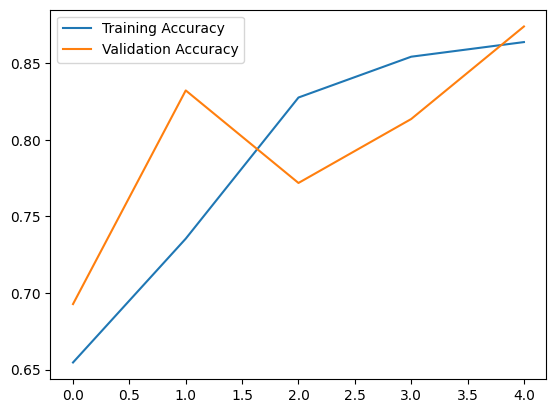

In [9]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

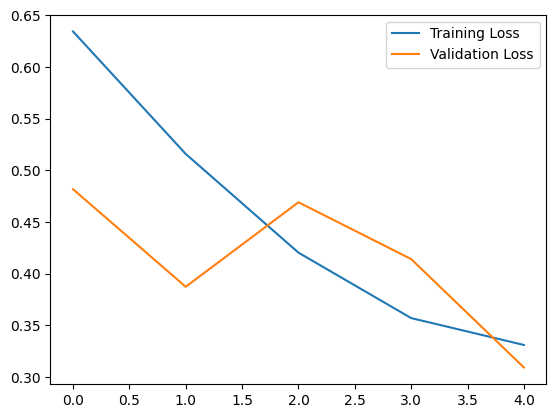

In [10]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Evaluation

In [13]:
loss, accuracy = model.evaluate(val_set)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.8849 - loss: 0.2855
Validation Loss: 0.3088017702102661
Validation Accuracy: 0.873001754283905


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

In [20]:
# Get true labels and predictions
val_set.reset()
Y_true = val_set.classes
Y_pred_probs = model.predict(val_set)
Y_pred = np.argmax(Y_pred_probs, axis=1)

#  Class names
class_names = list(val_set.class_indices.keys())

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step


# Predict an image

In [19]:
from tensorflow.keras.preprocessing import image

img_path = '/kaggle/input/satellite-image-classification/data/desert/desert(100).jpg'
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]
print(f"Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Class: desert


In [21]:
model.save('satellite_cnn_model.h5')

#  Conclusion: 
In this project, a Convolutional Neural Network (CNN) was developed and trained to classify satellite images into predefined land cover categories. The model architecture was incrementally improved by adding more convolutional and pooling layers, leading to better feature extraction and higher accuracy.

## Key achievements include:

- Successful preprocessing and augmentation of satellite image data for improved generalization.

- Construction of a CNN with multiple layers to capture complex spatial hierarchies in satellite images.

- Model performance improvements with additional convolutional layers, as demonstrated through training and validation accuracy/loss curves.

- Effective classification accuracy on the test dataset, showcasing the CNN’s ability to distinguish between different land cover types.

This study highlights the effectiveness of deep learning—especially CNNs—in handling spatial data such as satellite imagery. With further tuning, larger datasets, and possibly the integration of transfer learning, even higher classification performance could be achieved for practical remote sensing applications.